# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
edu = pd.read_csv('states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
edu.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [5]:
edu.rename({
    'ENROLL':'ENROLL_ALL_EST',
    'GRADES_ALL_G':'ENROLL_ALL',
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12'
    },
    axis=1,inplace=True)

In [6]:
edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Average Math 8 Score*

How many years of data are logged in our dataset? 

In [10]:
edu["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [50]:
MATH_8 = edu.groupby("STATE")["AVG_MATH_8_SCORE"].mean()
print(MATH_8)

STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

In [51]:
MI = MATH_8.loc["MICHIGAN"]
OH = MATH_8.loc["OHIO"]

print("With a score of " + str(max([MI, OH])) + " ...")
if MI > OH:
    print("Michigan :D")
else:
    print("Ohio :|")

With a score of 282.25 ...
Ohio :|


Find the average for your outcome score across all states in 2019

In [60]:
MATH_8_Yr = edu.groupby("YEAR")["AVG_MATH_8_SCORE"].mean()
MATH_8_Yr.loc[2019]

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [66]:
edu.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [84]:
edu["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = (edu["INSTRUCTION_EXPENDITURE"] / edu["ENROLL_ALL"])
edu.groupby("STATE")["INSTRUCTION_EXPENDITURE_PER_STUDENT"].describe()

,count,mean,std,min,25%,50%,75%,max
STATE,,,,,,,,
ALABAMA,25.0,3.952769,1.130743,2.025197,2.966246,3.938416,5.122786,5.293244
ALASKA,25.0,6.777260,2.280794,3.929534,5.029422,5.828901,8.717601,11.206549
ARIZONA,25.0,3.058119,0.601078,2.132082,2.465914,3.090821,3.510464,3.986249
ARKANSAS,25.0,4.000391,1.209895,1.761967,3.023978,4.023871,5.195251,5.387109
CALIFORNIA,25.0,4.514267,1.250914,2.301234,3.389097,4.609008,5.467829,6.750094
COLORADO,25.0,4.061939,0.935480,2.457631,3.223445,4.220397,4.921758,5.289213
CONNECTICUT,25.0,7.356165,2.292186,4.397434,5.222358,6.749298,9.353054,11.419222
DELAWARE,25.0,5.929680,1.551387,3.572838,4.517120,5.958007,6.964290,8.269059
DISTRICT_OF_COLUMBIA,25.0,5.730159,1.299311,3.943357,4.363306,6.023112,6.718161,7.803467


Feature engineering justification: I chose to quantify the effect of per-student instructional expenditure on grade eight math scores because I believed it would produce at least a moderate relationship due to the known benefits of better resources on student performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

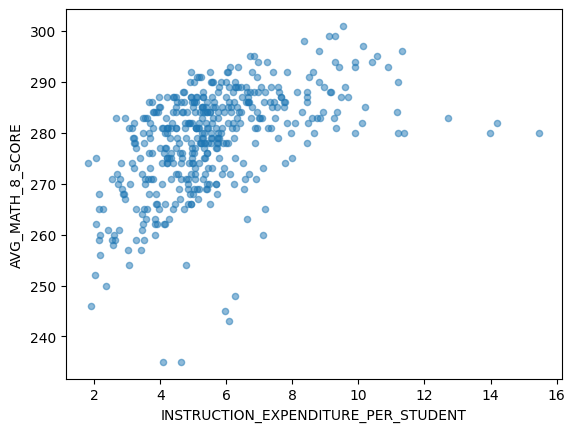

In [85]:
edu.plot.scatter(x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y="AVG_MATH_8_SCORE", alpha=0.5)

Gauging average math eight scores against per-student instruction expenditure yielded a weak to moderate relationship.

**Visualization 2**

<AxesSubplot:xlabel='AVG_MATH_4_SCORE', ylabel='AVG_MATH_8_SCORE'>

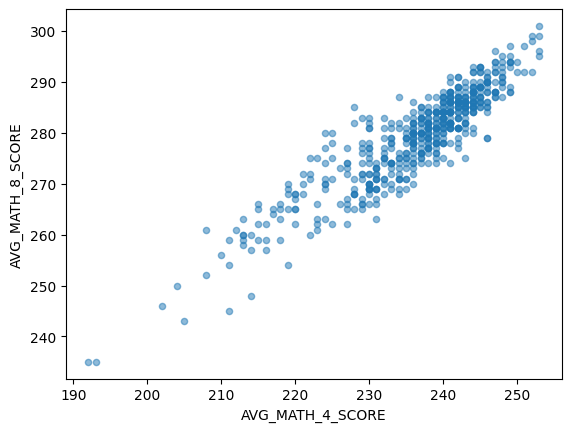

In [82]:
edu.plot.scatter(x="AVG_MATH_4_SCORE", y="AVG_MATH_8_SCORE", alpha=0.5)

As expected based on the tutorial, past performance and future performance are strongly related, meaning grade four math scores are a strong predictor of grade eight math scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [131]:
from sklearn.model_selection import train_test_split

In [146]:
X = edu[["INSTRUCTION_EXPENDITURE_PER_STUDENT","AVG_MATH_4_SCORE"]].dropna()
y = edu.loc[X.index]["AVG_MATH_8_SCORE"]

In [147]:
y.fillna(y.mean(), inplace=True)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [149]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [150]:
# create your model here
model = LinearRegression()

In [151]:
model.fit(X_train, y_train)

LinearRegression()

In [152]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [153]:
print(model.intercept_)
print(model.coef_)

49.80521976079862
[-0.18124829  0.97556057]


In [154]:
model.score(X_test, y_test)

0.845274298751826

In [155]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.9900686370138994

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

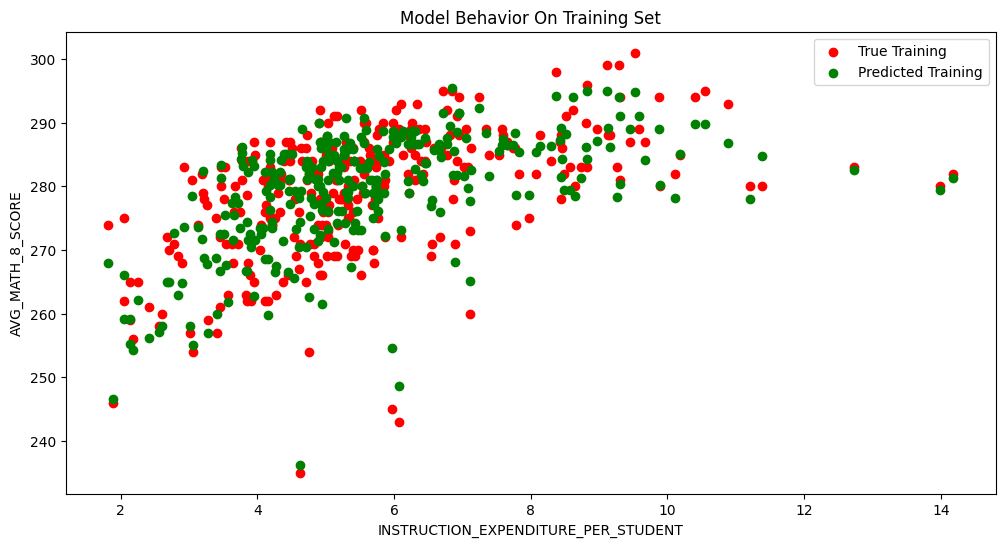

In [156]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

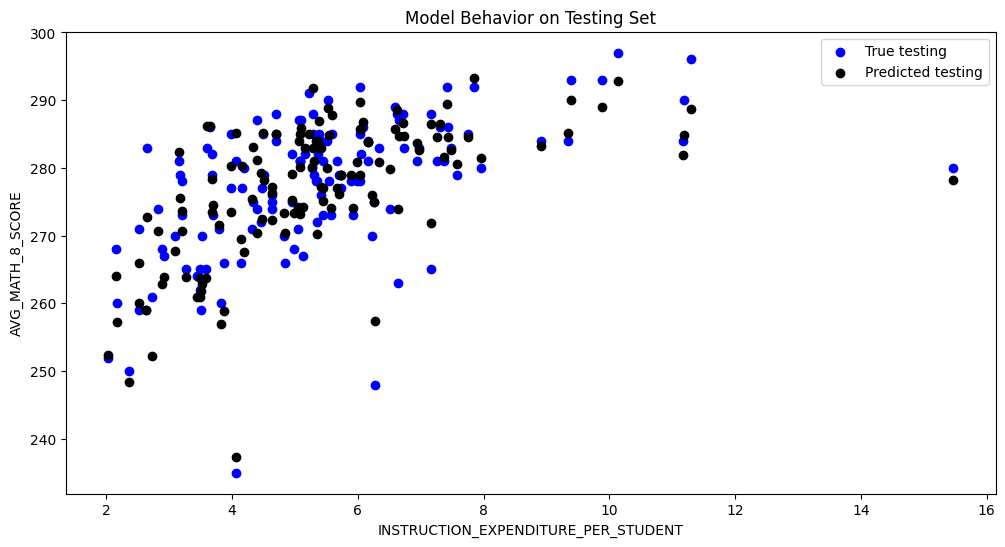

In [157]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

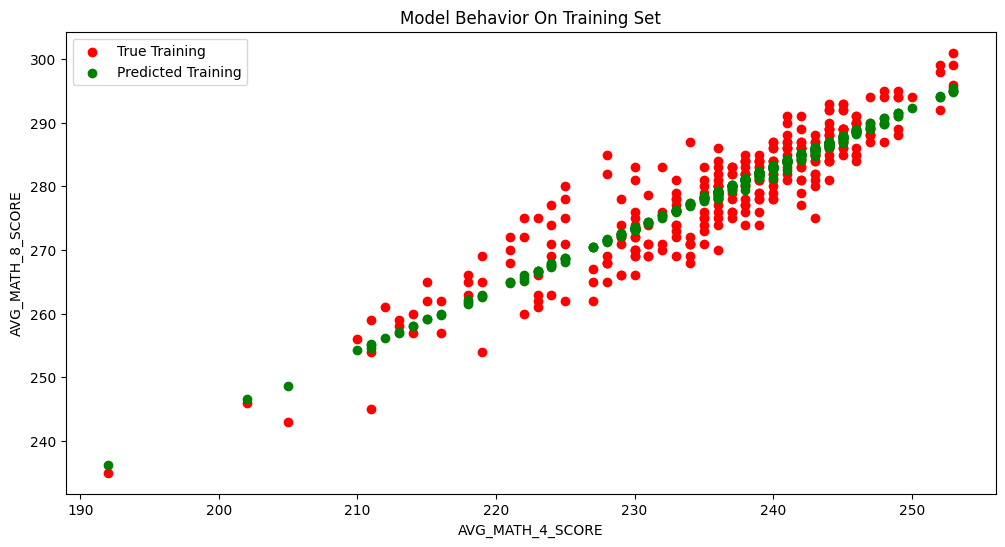

In [158]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

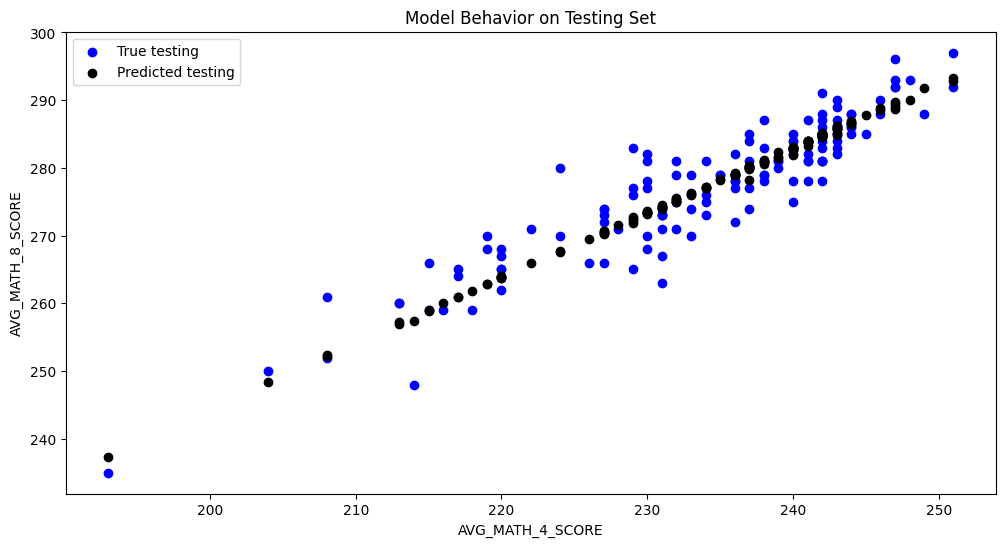

In [159]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**Methods**

This model was trained on a 70/30 linear regression model using per-student instruction expenditure and average grade four math scores to predict average grade eight math scores.

**Findings**

The model appears to be not sufficiently trained as a lack of vertical variance among the trained and tested sets with respect to grade four math scores demonstrates the need for more data sets with strong relationships to fully predict the behavior of average grade eight math scores. This can be achieved by testing the model with average grade four and grade eight reading scores, which have been shown to have a strong relationship with average math eight scores.

**Performance**

With an R^2 value of 0.845 and a RMS error of 3.99, metrics confirm the inaccuracy of the model. Further training will increase the R^2 value and lower the RMS error, resulting in a more accurate model.